In [1]:
#! pip install milcatrusspy

In [2]:
from milcatrusspy import Model

In [3]:
# MODELO:

#
#
#   ## ===============#==============#================ .... n veces ============#============#==================##
#                     #              #                                          #            #
#    h                #              #                                          #            #
#             b       #              #                                          #            #
#   ## ===============#==============#================ .... n veces ============#============#==================##
#

# DATOS:
nTramos = 14
E = 2.1e6
A = 0.02
h = 0.2
b = 0.2

# CONSTRUCCIÓN:
armadura = Model(2)


nodes = {}
nodeTag = 1
for i in range(nTramos+1):
    nodes[nodeTag] = [(i-1)*b, 0]
    nodeTag += 1
    nodes[nodeTag] = [(i-1)*b, h]
    nodeTag += 1

for tag, (x, y) in nodes.items():
    armadura.add_node(tag, x, y)

print(nodes)

{1: [-0.2, 0], 2: [-0.2, 0.2], 3: [0.0, 0], 4: [0.0, 0.2], 5: [0.2, 0], 6: [0.2, 0.2], 7: [0.4, 0], 8: [0.4, 0.2], 9: [0.6000000000000001, 0], 10: [0.6000000000000001, 0.2], 11: [0.8, 0], 12: [0.8, 0.2], 13: [1.0, 0], 14: [1.0, 0.2], 15: [1.2000000000000002, 0], 16: [1.2000000000000002, 0.2], 17: [1.4000000000000001, 0], 18: [1.4000000000000001, 0.2], 19: [1.6, 0], 20: [1.6, 0.2], 21: [1.8, 0], 22: [1.8, 0.2], 23: [2.0, 0], 24: [2.0, 0.2], 25: [2.2, 0], 26: [2.2, 0.2], 27: [2.4000000000000004, 0], 28: [2.4000000000000004, 0.2], 29: [2.6, 0], 30: [2.6, 0.2]}


In [4]:
# ELEMENTS

elements = {}

tagEle = 1
i = 1
for tramo in range(1, nTramos + 1):
    elements[tagEle] = [i, i+1, E, A]
    tagEle += 1
    elements[tagEle] = [i+1, i+2, E, A]
    tagEle += 1
    elements[tagEle] = [i+2, i+3, E, A]
    tagEle += 1
    elements[tagEle] = [i+1, i+3, E, A]
    tagEle += 1
    elements[tagEle] = [i, i+2, E, A]
    tagEle += 1
    i += 2


for tag, (ni, nj, E, A) in elements.items():
    armadura.add_element(tag, ni, nj, E, A)
print(elements)

{1: [1, 2, 2100000.0, 0.02], 2: [2, 3, 2100000.0, 0.02], 3: [3, 4, 2100000.0, 0.02], 4: [2, 4, 2100000.0, 0.02], 5: [1, 3, 2100000.0, 0.02], 6: [3, 4, 2100000.0, 0.02], 7: [4, 5, 2100000.0, 0.02], 8: [5, 6, 2100000.0, 0.02], 9: [4, 6, 2100000.0, 0.02], 10: [3, 5, 2100000.0, 0.02], 11: [5, 6, 2100000.0, 0.02], 12: [6, 7, 2100000.0, 0.02], 13: [7, 8, 2100000.0, 0.02], 14: [6, 8, 2100000.0, 0.02], 15: [5, 7, 2100000.0, 0.02], 16: [7, 8, 2100000.0, 0.02], 17: [8, 9, 2100000.0, 0.02], 18: [9, 10, 2100000.0, 0.02], 19: [8, 10, 2100000.0, 0.02], 20: [7, 9, 2100000.0, 0.02], 21: [9, 10, 2100000.0, 0.02], 22: [10, 11, 2100000.0, 0.02], 23: [11, 12, 2100000.0, 0.02], 24: [10, 12, 2100000.0, 0.02], 25: [9, 11, 2100000.0, 0.02], 26: [11, 12, 2100000.0, 0.02], 27: [12, 13, 2100000.0, 0.02], 28: [13, 14, 2100000.0, 0.02], 29: [12, 14, 2100000.0, 0.02], 30: [11, 13, 2100000.0, 0.02], 31: [13, 14, 2100000.0, 0.02], 32: [14, 15, 2100000.0, 0.02], 33: [15, 16, 2100000.0, 0.02], 34: [14, 16, 2100000.0, 0

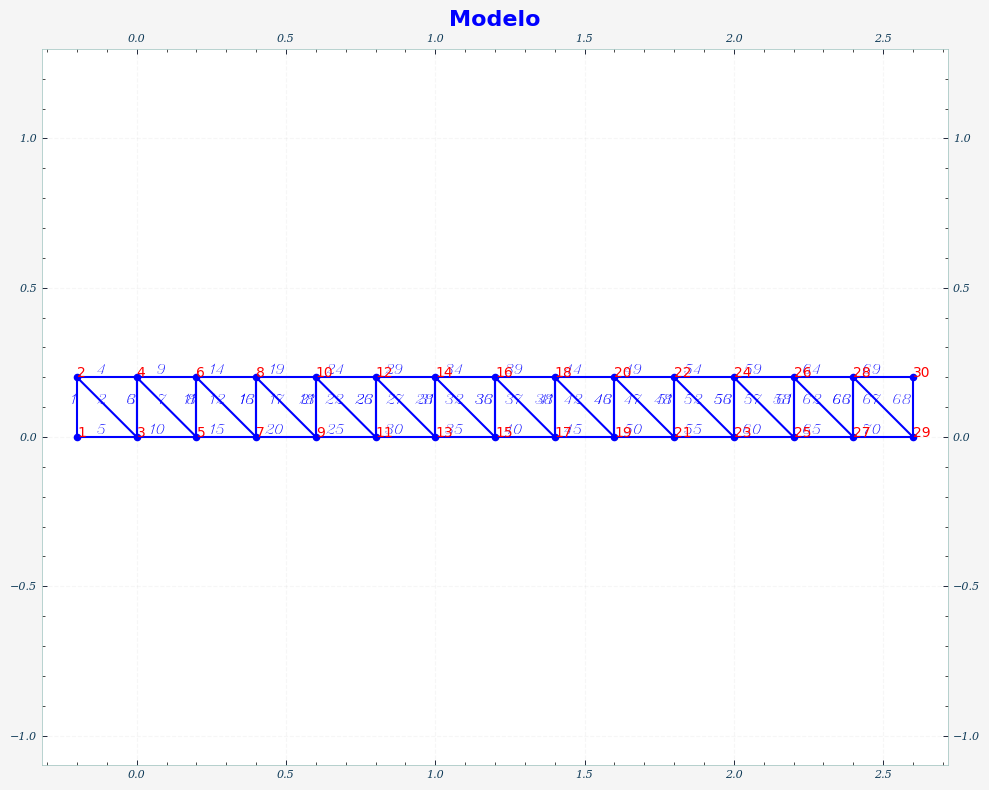

In [5]:
armadura.plot_model(labels=True)

In [6]:
armadura.set_restraints(tag_node=1, ux=True, uy=True)
armadura.set_restraints(tag_node=2, ux=True, uy=True)
armadura.set_restraints(tag_node=nodeTag-1, ux=True, uy=True)
armadura.set_restraints(tag_node=nodeTag-2, ux=True, uy=True)

In [7]:

nodeForceTag = int(nTramos+1)
forceMagnitude = -1000

armadura.set_load(tag_node=nodeForceTag, fy=forceMagnitude)

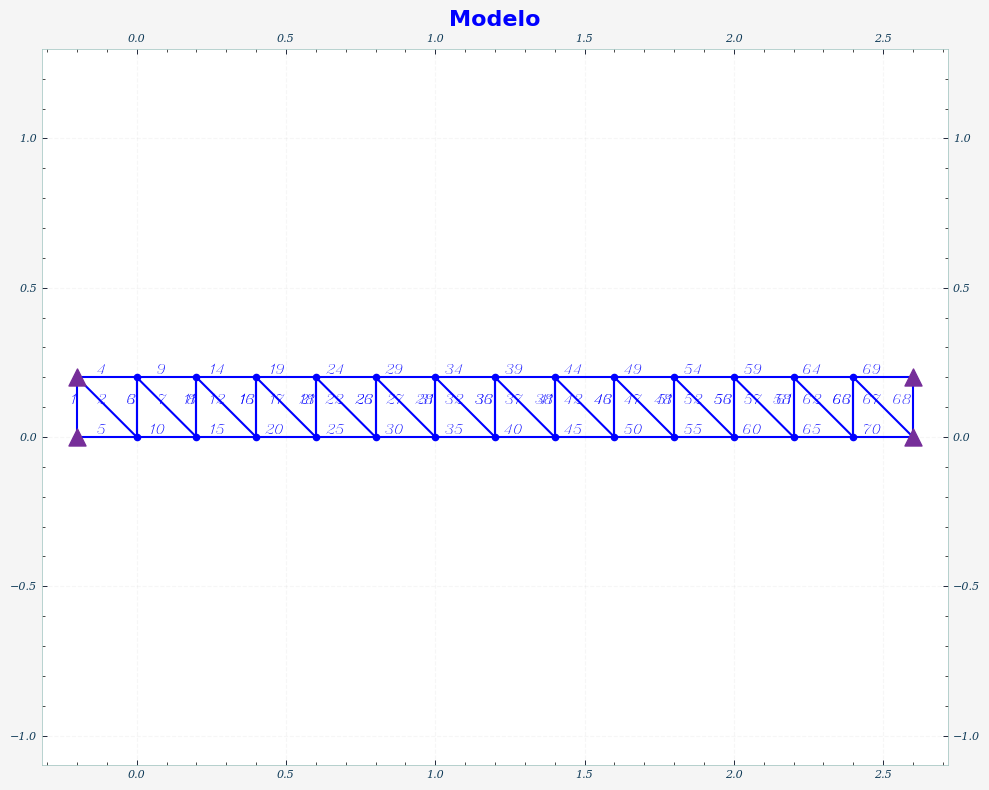

In [8]:
armadura.plot_model(labels=False)

In [9]:
armadura.solve()

(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.34877561e-03, -1.50898455e-02,  5.96782323e-03, -1.62815096e-02,
        -1.43142231e-02, -4.33046258e-02,  9.55231835e-03, -4.44962899e-02,
        -1.78963425e-02, -7.86860206e-02,  1.07534853e-02, -7.98776846e-02,
        -1.90951338e-02, -1.16467374e-01,  9.57132423e-03, -1.17659038e-01,
        -1.79105969e-02, -1.51882029e-01,  6.00583500e-03, -1.53073693e-01,
        -1.43427319e-02, -1.80163330e-01,  5.70176487e-05, -1.81354994e-01,
        -8.39153885e-03, -1.96544620e-01, -8.27512782e-03, -1.95355332e-01,
        -5.70176487e-05, -1.80409591e-01, -1.42286966e-02, -1.79220303e-01,
         5.89892691e-03, -1.52365048e-01, -1.78036888e-02, -1.51175760e-01,
         9.47629482e-03, -1.17168146e-01, -1.90001043e-02, -1.15978857e-01,
         1.06750861e-02, -7.95760362e-02, -1.78179432e-02, -7.83867479e-02,
         9.49530070e-03, -4.43458732e-02, -1.42572055e-02, -4.31565849e-02,
         5.9

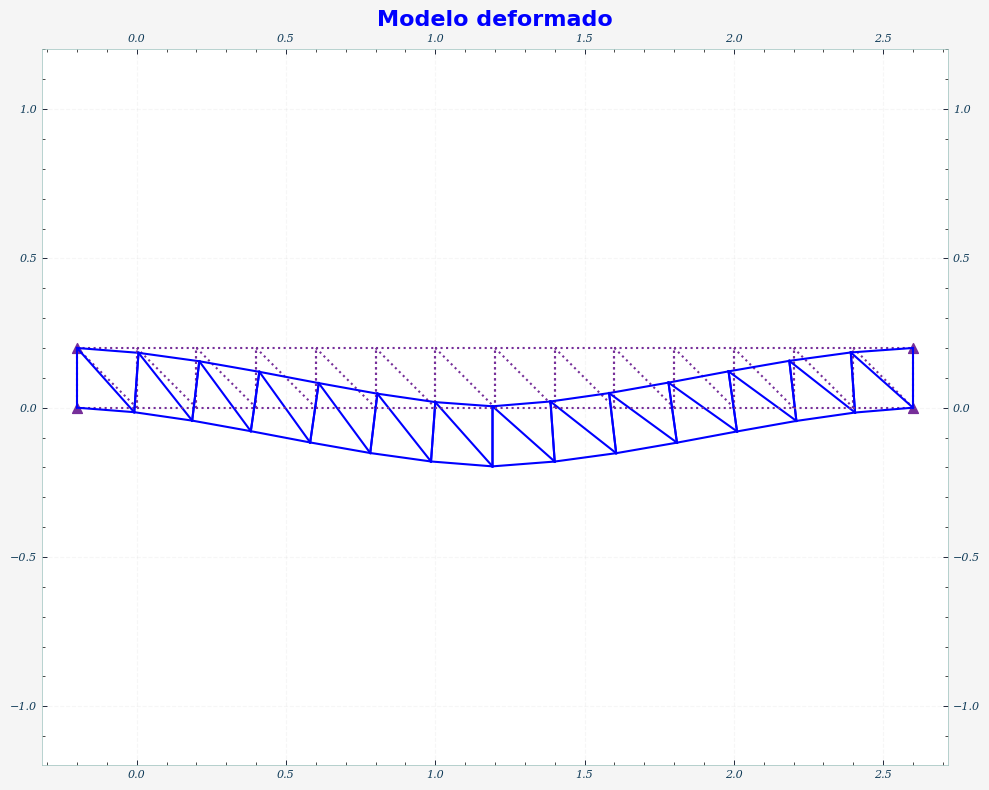

In [10]:
armadura.plot_deformed(labels=False)

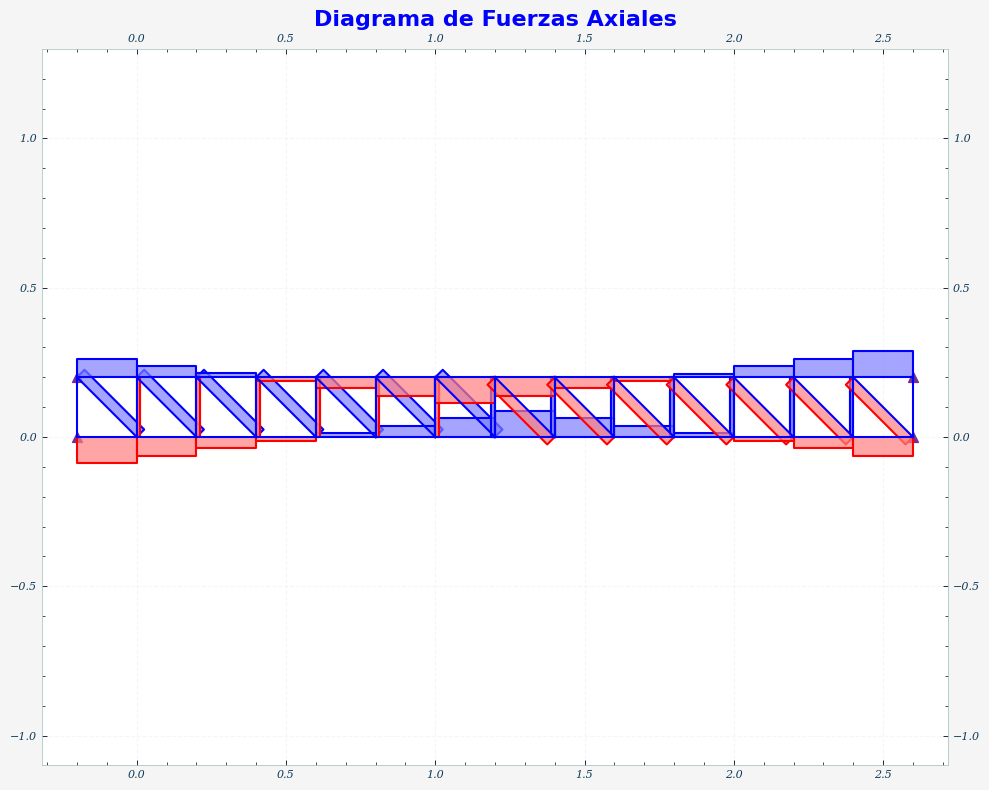

In [11]:
armadura.plot_axial_forces(0.00005, False)

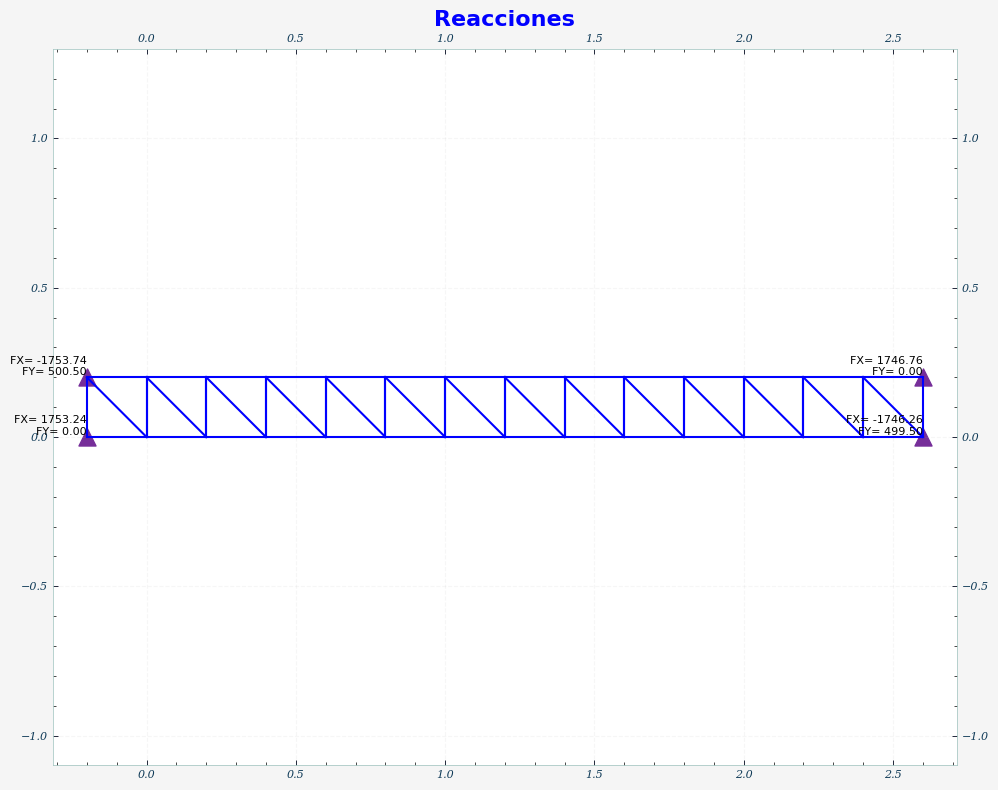

In [15]:
armadura.plot_reactions()

In [12]:
node, ele = armadura.get_results()
node, ele

(         Node 1       Node 2    Node 3    Node 4    Node 5    Node 6  \
 UX     0.000000     0.000000 -0.008349  0.005968 -0.014314  0.009552   
 UY     0.000000     0.000000 -0.015090 -0.016282 -0.043305 -0.044496   
 RX  1753.242879 -1753.741783  0.000000  0.000000  0.000000  0.000000   
 RY     0.000000   500.498904  0.000000  0.000000  0.000000  0.000000   
 
       Node 7    Node 8    Node 9   Node 10  ...   Node 21   Node 22   Node 23  \
 UX -0.017896  0.010753 -0.019095  0.009571  ...  0.009476 -0.019000  0.010675   
 UY -0.078686 -0.079878 -0.116467 -0.117659  ... -0.117168 -0.115979 -0.079576   
 RX  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
 RY  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
 
      Node 24   Node 25   Node 26   Node 27   Node 28      Node 29      Node 30  
 UX -0.017818  0.009495 -0.014257  0.005937 -0.008318     0.000000     0.000000  
 UY -0.078387 -0.044346 -0.043157 -0.016235 -0.015046    

In [13]:
node

,Node 1,Node 2,Node 3,Node 4,Node 5,Node 6,Node 7,Node 8,Node 9,Node 10,...,Node 21,Node 22,Node 23,Node 24,Node 25,Node 26,Node 27,Node 28,Node 29,Node 30
UX,0.000000,0.000000,-0.008349,0.005968,-0.014314,0.009552,-0.017896,0.010753,-0.019095,0.009571,...,0.009476,-0.019000,0.010675,-0.017818,0.009495,-0.014257,0.005937,-0.008318,0.000000,0.000000
UY,0.000000,0.000000,-0.015090,-0.016282,-0.043305,-0.044496,-0.078686,-0.079878,-0.116467,-0.117659,...,-0.117168,-0.115979,-0.079576,-0.078387,-0.044346,-0.043157,-0.016235,-0.015046,0.000000,0.000000
RX,1753.242879,-1753.741783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1746.258217,1746.757121
RY,0.000000,500.498904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,499.501096,0.000000


In [14]:
ele

,Element 1,Element 2,Element 3,Element 4,Element 5,Element 6,Element 7,Element 8,Element 9,Element 10,...,Element 61,Element 62,Element 63,Element 64,Element 65,Element 66,Element 67,Element 68,Element 69,Element 70
U1,0.0,0.0,-0.01509,0.0,0.0,-0.01509,0.015733,-0.043305,0.005968,-0.008349,...,-0.044346,0.020435,-0.016235,-0.014257,0.009495,-0.016235,0.004757,0.0,-0.008318,0.005937
U2,0.0,0.004767,-0.016282,0.005968,-0.008349,-0.016282,0.020499,-0.044496,0.009552,-0.014314,...,-0.043157,0.015678,-0.015046,-0.008318,0.005937,-0.015046,0.0,0.0,0.0,0.0
F1,0.0,-707.81,250.25,-1253.24,1753.24,250.25,-707.81,250.25,-752.74,1252.74,...,-249.75,706.4,-249.75,-1247.26,747.26,-249.75,706.4,0.0,-1746.76,1246.76
F2,0.0,707.81,-250.25,1253.24,-1753.24,-250.25,707.81,-250.25,752.74,-1252.74,...,249.75,-706.4,249.75,1247.26,-747.26,249.75,-706.4,0.0,1746.76,-1246.76
Estado,Compresion,Traccion,Compresion,Traccion,Compresion,Compresion,Traccion,Compresion,Traccion,Compresion,...,Traccion,Compresion,Traccion,Traccion,Compresion,Traccion,Compresion,Compresion,Traccion,Compresion
Longitud,0.2,0.28,0.2,0.2,0.2,0.2,0.28,0.2,0.2,0.2,...,0.2,0.28,0.2,0.2,0.2,0.2,0.28,0.2,0.2,0.2
